In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
data.shape

(200, 4)

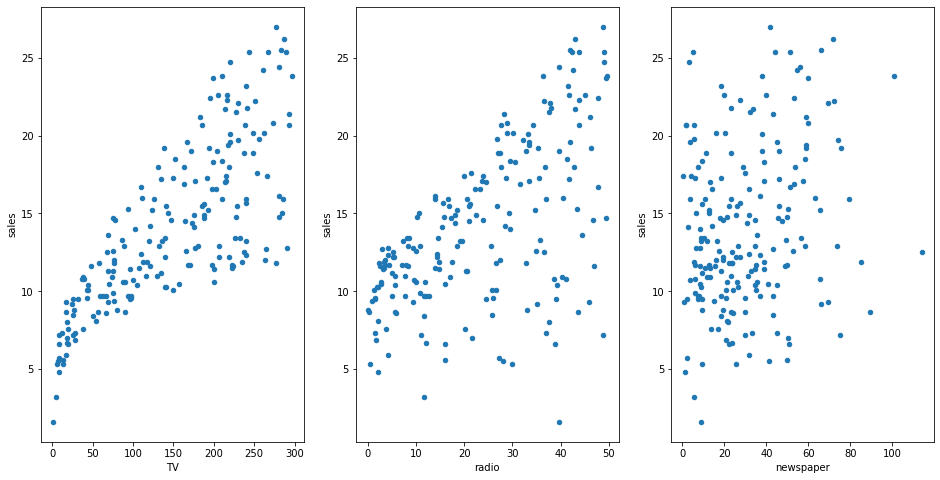

In [8]:
# Draw figues by 1 row and 3 coloumns
fig, axs = plt.subplots(1, 3)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8)) # ax=axs[0] = 1st figure
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2]);

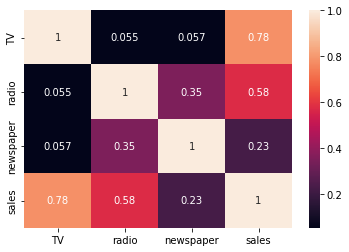

In [9]:
sns.heatmap(data.corr(), annot = True);

#### Selected any one feature from the three features

In [10]:
## I selected Tv. You can select others
features = data[['newspaper']].values
target = data[['sales']].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 6)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


In [ ]:
# X_train = X_train.reshape(150,-1)
# X_train.shape

In [ ]:
# X_test = X_test.reshape(50,-1)
# X_test.shape

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [15]:
my_first_model = LinearRegression()

At this stage my m and c values are initialized to some random value. We need to train the model to find the optimal value of the weights(parameters) of the Linear Regression model.

Fitting Training Dataset

---



In [16]:
my_first_model.fit(X_train,y_train)

LinearRegression()

In [17]:
#Bi ==> m in y = mx + c (slope)
my_first_model.coef_

array([[0.07750161]])

In [18]:
#Bo ==> c in y = mx + c
my_first_model.intercept_

array([11.88037471])

Fitting Test Dataset

---



In [19]:
my_first_model.fit(X_test,y_test)

LinearRegression()

In [20]:
my_first_model.coef_

array([[0.01265582]])

In [21]:
my_first_model.intercept_

array([13.44107869])

Prediction and Evaluation on Train Data

---



In [22]:
preds_train = my_first_model.predict(X_train)
print('MAE : ', mean_absolute_error(y_train, preds_train))
print('MSE : ', mean_squared_error(y_train, preds_train))
print('R2 Score : ', my_first_model.score(X_train, y_train))

MAE :  4.334555859357523
MSE :  28.22483208814113
R2 Score :  0.02370669550574034


Prediction and Evaluation on Test Data

---



In [23]:
preds = my_first_model.predict(X_test)
print('MAE : ', mean_absolute_error(y_test, preds))
print('MSE : ', mean_squared_error(y_test, preds))
print('R2 score : ', my_first_model.score(X_test, y_test))

MAE :  3.8757272613556855
MSE :  21.509181146577948
R2 score :  0.004154599861495245


Interpreting the coefficients

---



1. A unit increase in radio ad spending was associated with a .022 unit increase in Sales

OR 

An additional 1000 $ spent on radio was associated with an increase in sales of 21.591 units 

y = mx + c

You have the values of m and c. Given any value of x you can predict the value of y

In a new market my spend on radio is $50,000. I want you to tell me the sales generated due to this spend

In [ ]:
.22*50 + 6.709

17.709

Lets try to plot best fit line

In [24]:
#Create a dataframe of the minimum and maximum value of the radio feature
X_new = pd.DataFrame({'newspaper':[data.radio.min(),data.radio.max()]})
X_new.head()

,newspaper
0,0.0
1,49.6


In [25]:
#Setting prediction on the minimum and maximum value of the radio feature
preds = my_first_model.predict(X_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


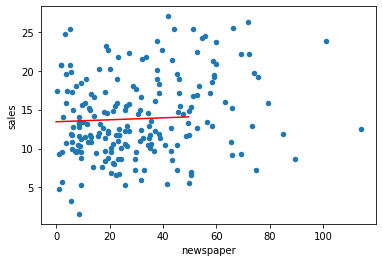

In [27]:
data.plot(kind='scatter', x='newspaper', y='sales')
plt.plot(X_new,preds,c='red');

In [28]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
my_stat_model = smf.ols(formula='sales ~ radio', data=data).fit()
my_stat_model.pvalues

Intercept    3.561071e-39
radio        4.354966e-19
dtype: float64

H0 : There is no relationship between independent(TV) variable and dependent(sales) variable

H1 : There is a relationship between independent(TV) variable and dependent(Sales) variable

if my p value for TV is less than .05 then I will reject the null hypothesis

In [30]:
my_stat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           4.35e-19
Time:                        00:45:39   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To complete the supervised learning flow follow the below steps after fitting the model

In [32]:
my_model_preds = my_first_model.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [34]:
#MAE
mean_absolute_error(my_model_preds,y_test)

3.8757272613556855

In [35]:
#MSE
mean_squared_error(my_model_preds,y_test)

21.509181146577948

In [36]:
#RMSE
np.sqrt(mean_squared_error(my_model_preds,y_test))

4.637799170574115